In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from google.colab import files

Mounted at /content/gdrive


In [ ]:
#read training dataset 1
data1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset_1_Training.csv')

X_train_actual_1=data1[:-2].T[1:].values

y_train_actual_1 = data1[-2:].T[-130:].T.values

In [ ]:
#read training dataset 2
data2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset_2_Training.csv')

X_train_actual_2=data2[:-4].T[1:].values

y_train_actual_2 = data2[-4:].T[-340:].T.values

In [ ]:
co1={'X':X_train_actual_1,'Y': y_train_actual_1[0]};
co2={'X':X_train_actual_1,'Y': y_train_actual_1[1]};

co3={'X':X_train_actual_2,'Y': y_train_actual_2[0]};
co4={'X':X_train_actual_2,'Y': y_train_actual_2[1]};
co5={'X':X_train_actual_2,'Y': y_train_actual_2[2]};
co6={'X':X_train_actual_2,'Y': y_train_actual_2[3]};

In [ ]:
def feature_selector(X,Y,numberOfFeaturesToBeSelected=1):
  if(numberOfFeaturesToBeSelected == 1):
    totalNumberOfFeatures=X.shape[1]
    numberOfFeaturesToBeSelected=totalNumberOfFeatures//2;
  # define feature selection
  fs = SelectKBest(score_func=f_classif, k=numberOfFeaturesToBeSelected)
  # apply feature selection
  return fs.fit(X, Y)

In [ ]:
#data1.iloc[-2:,:]

In [ ]:
def plot_heat_map(X,Y,label,numberOfFeatures):
  X_selected_features=feature_selector(X,Y,numberOfFeaturesToBeSelected=numberOfFeatures).transform(X);
  X_sel_pd=pd.DataFrame(X_selected_features)
  X_sel_pd=X_sel_pd.astype(float)
  corrmat = X_sel_pd.corr()

  top_corr_features = corrmat.index

  plt.figure(figsize=(20,20))
  #plot heat map
  heatmap=sns.heatmap(X_sel_pd[top_corr_features].corr(),annot=True,cmap="RdYlGn")
  heatmap.set_title(label+'-top'+str(numberOfFeatures)+'-features-based-on-anova')

  figure = heatmap.get_figure()    
  figure.savefig(label+'-top'+str(numberOfFeatures)+'-features-based-on-anova.png', dpi=400)
  files.download(label+'-top'+str(numberOfFeatures)+'-features-based-on-anova.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

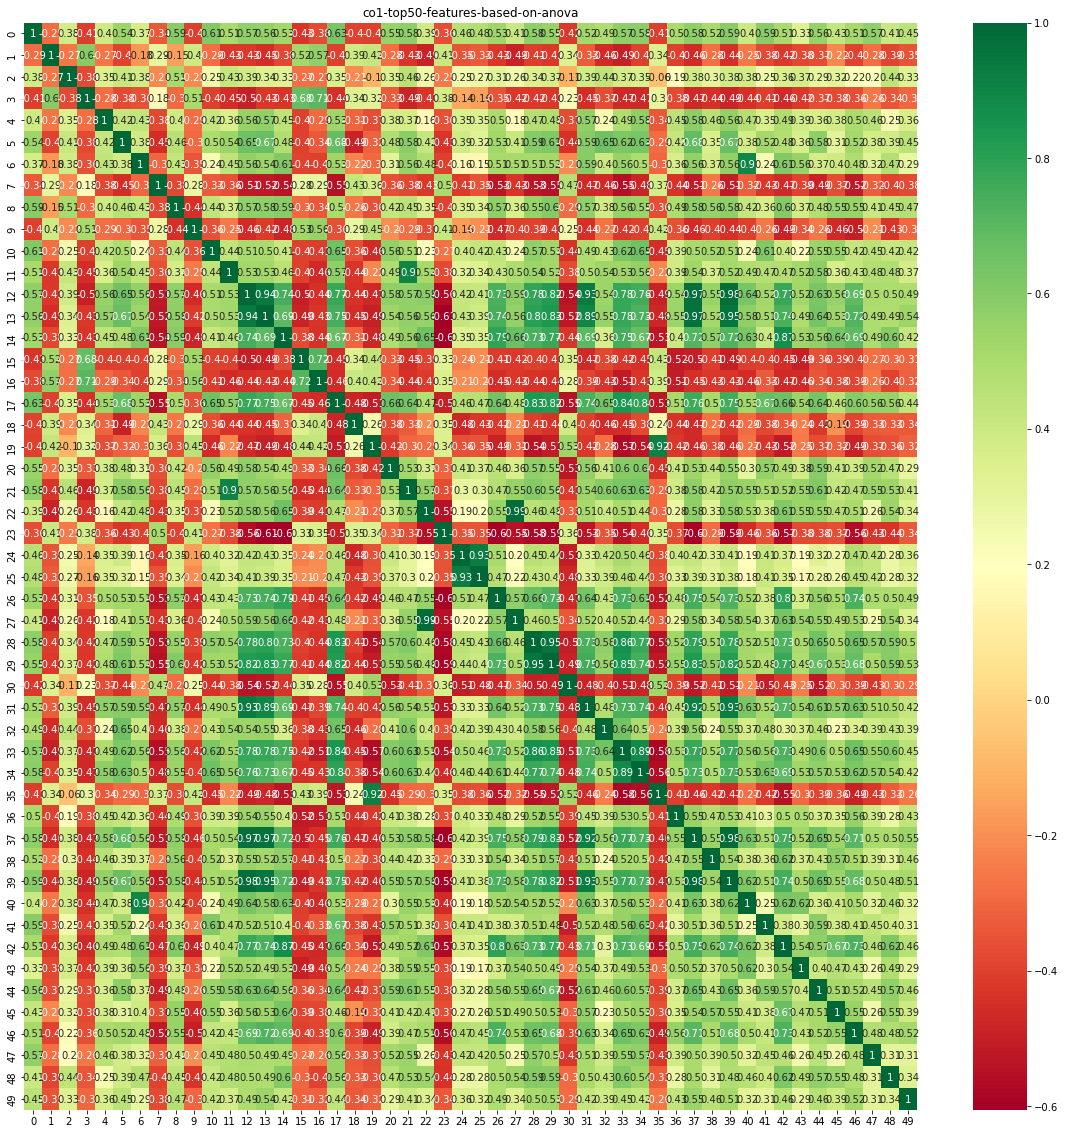

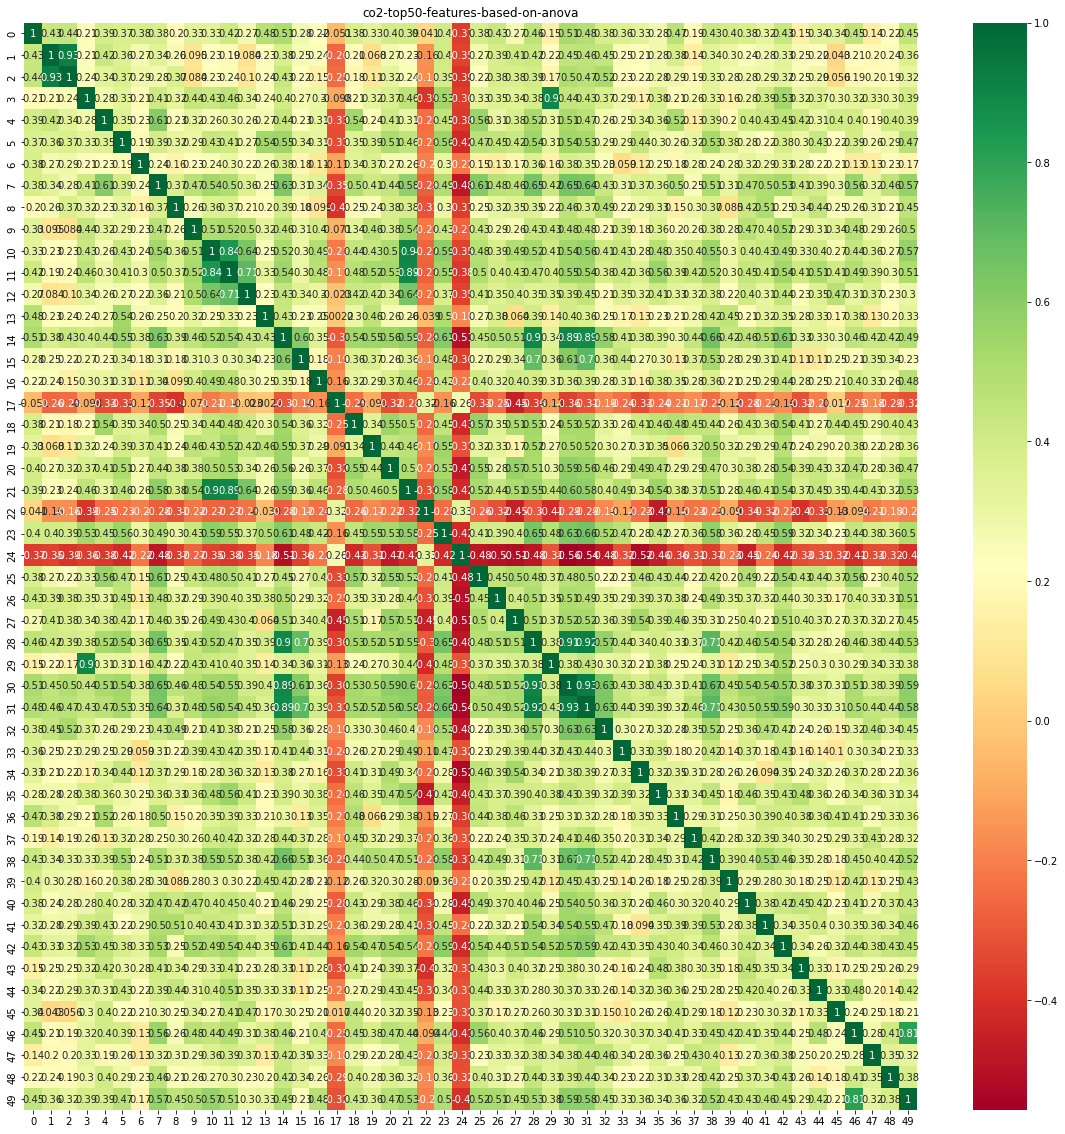

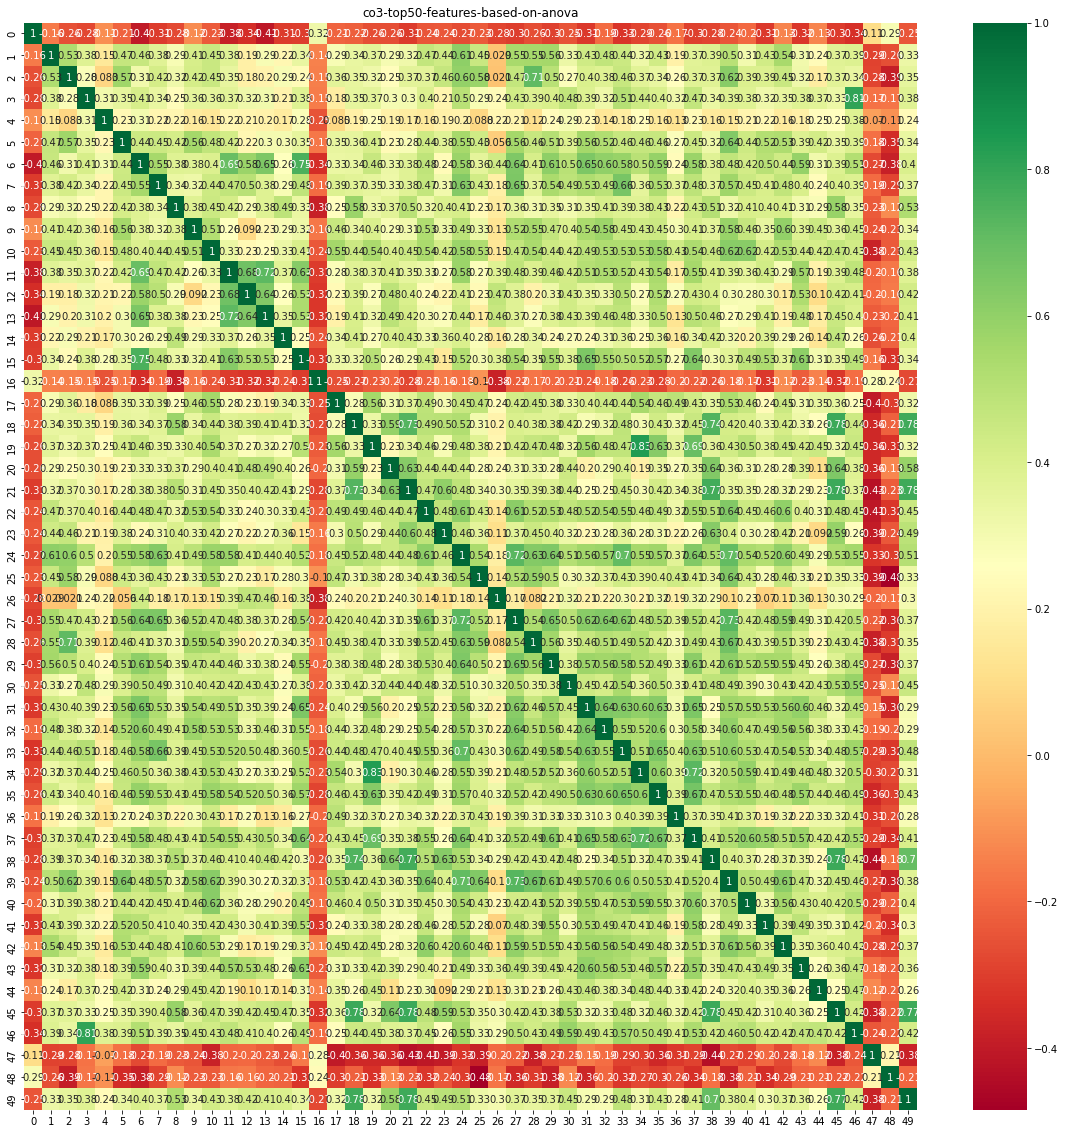

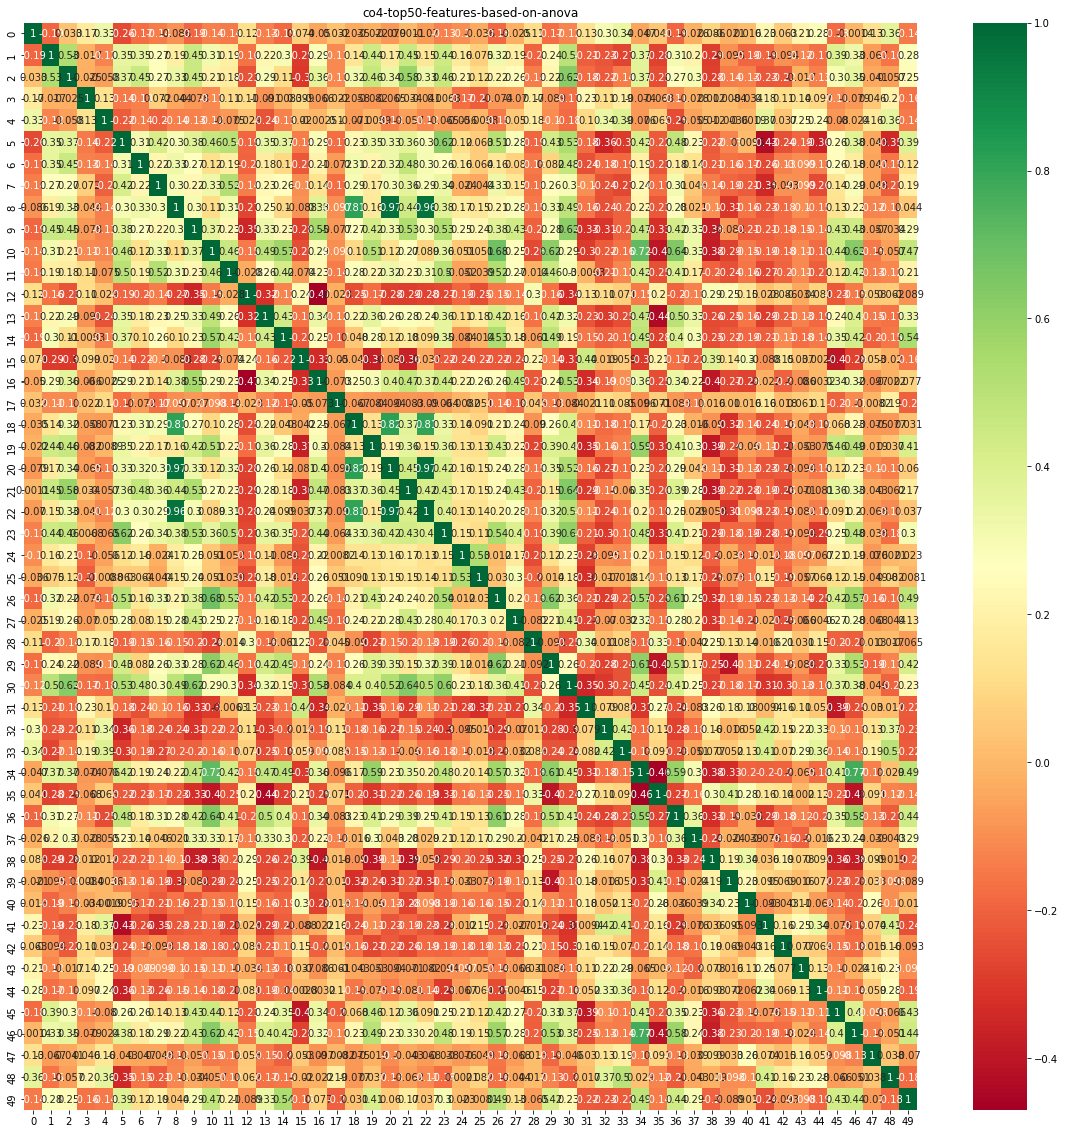

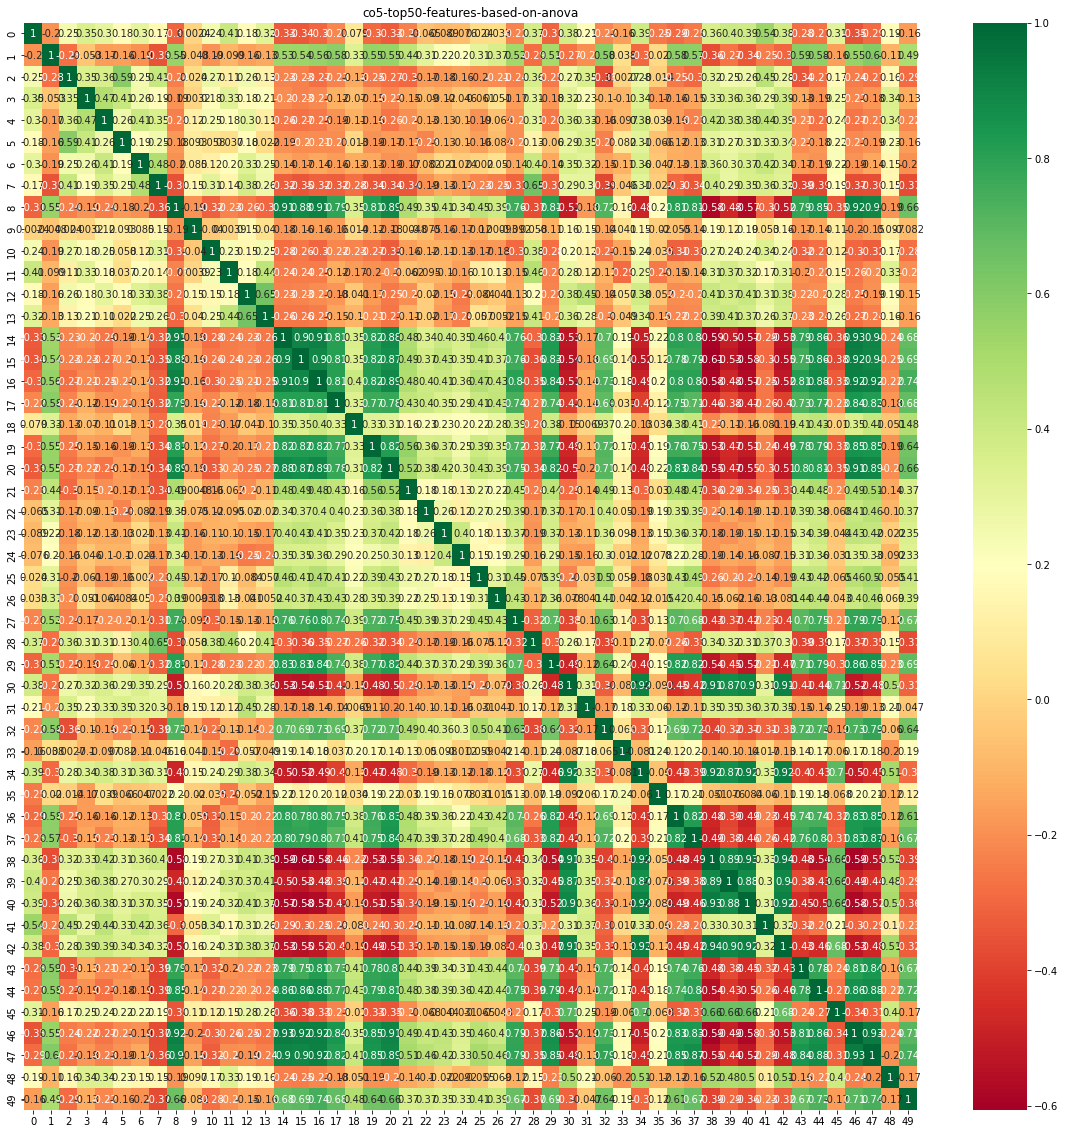

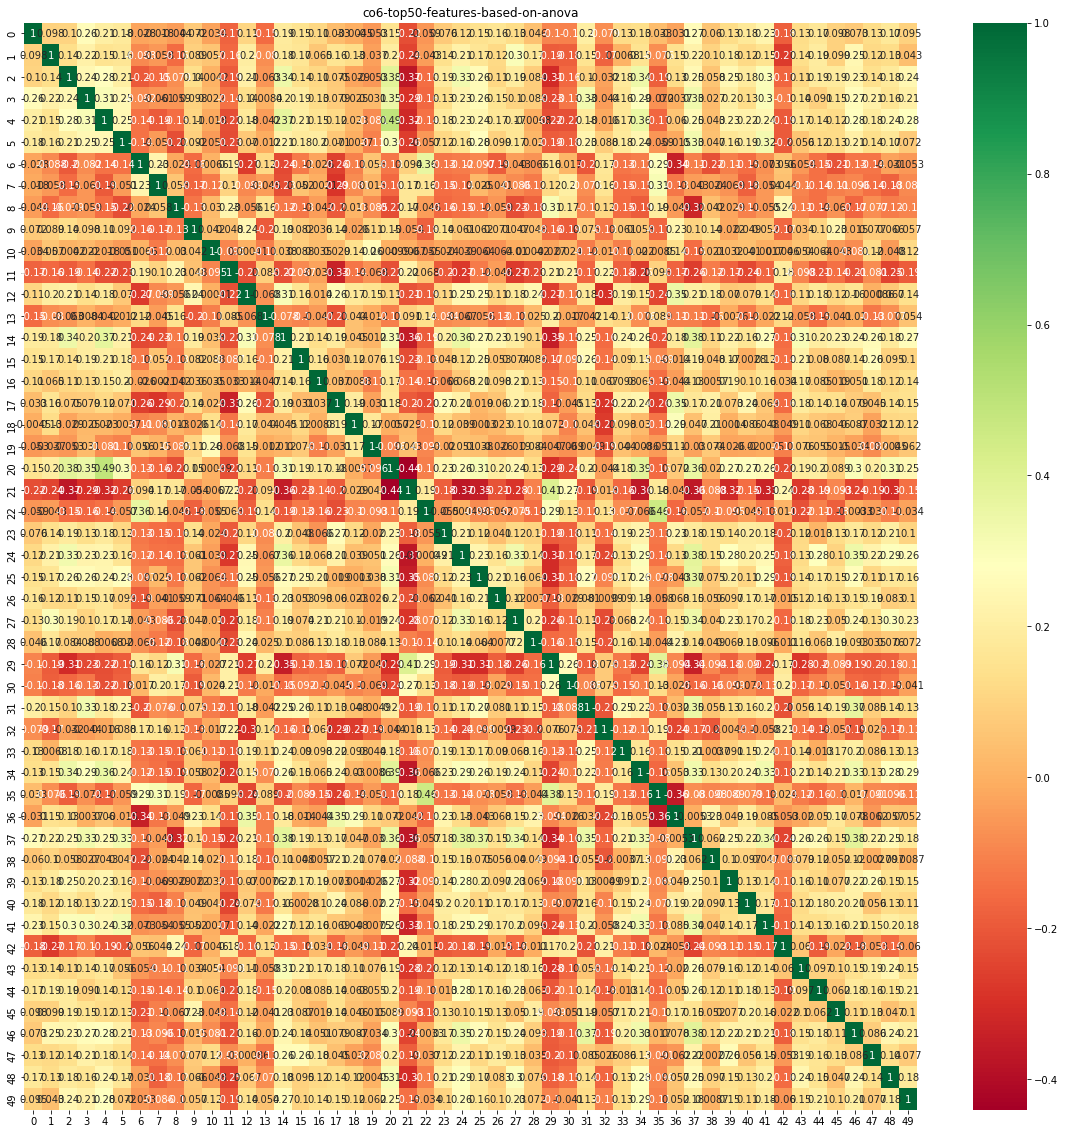

In [ ]:
plot_heat_map(co1['X'],co1['Y'],'co1',50)
plot_heat_map(co2['X'],co2['Y'],'co2',50)
plot_heat_map(co3['X'],co3['Y'],'co3',50)
plot_heat_map(co4['X'],co4['Y'],'co4',50)
plot_heat_map(co5['X'],co5['Y'],'co5',50)
plot_heat_map(co6['X'],co6['Y'],'co6',50)

In [3]:
input_folder = '/content/gdrive/My Drive/Colab Notebooks/data/'
def read_data(file, labels):
    data = pd.read_csv(input_folder+file, index_col=0).T

    if len(labels) == 0:
        return (data, np.array([]))

    X = data.iloc[:, :-len(labels)]
    y = data[labels]
    return (X, y)


X1, Y1 = read_data('Dataset_1_Training.csv', ["CO: 1", "CO: 2"])
co1 = Y1["CO: 1"]
co2 = Y1["CO: 2"]


X2, Y2 = read_data('Dataset_2_Training.csv', [
                   "CO: 3", "CO: 4", "CO: 5", "CO: 6"])
co3 = Y2["CO: 3"]
co4 = Y2["CO: 4"]
co5 = Y2["CO: 5"]
co6 = Y2["CO: 6"]


# Count plot to understand the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

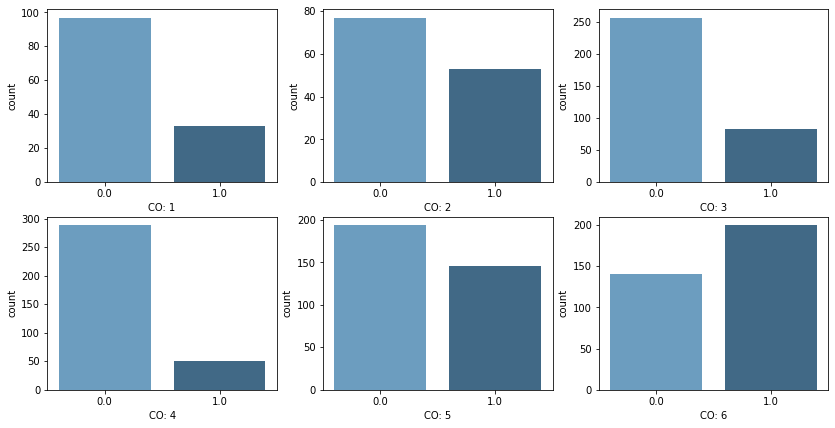

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 7))
sns.countplot(co1, ax=ax[0][0],palette="Blues_d")
sns.countplot(co2, ax=ax[0][1], palette="Blues_d")
sns.countplot(co3, ax=ax[0][2], palette="Blues_d")
sns.countplot(co4, ax=ax[1][0],palette="Blues_d")
sns.countplot(co5, ax=ax[1][1], palette="Blues_d")
sns.countplot(co6, ax=ax[1][2], palette="Blues_d")
plt.show()

In [9]:
def imp_features(X, y):
  selector = f_classif(X, y)
  p_values = pd.Series(selector[1])
  p_values.index = X.columns
  p_values.sort_values(ascending=True, inplace=True)
  p_values = p_values[p_values < 0.05]
  return X[p_values.index]


In [14]:
def pplot(X, y, target):
  sns.set()
  cols = X.columns[:5]
  temp = pd.concat([X[cols],y],axis=1)
  sns.pairplot(temp, hue=target, size = 2.5)
  plt.show()

# Pair Plot between top five features based on ANOVA 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


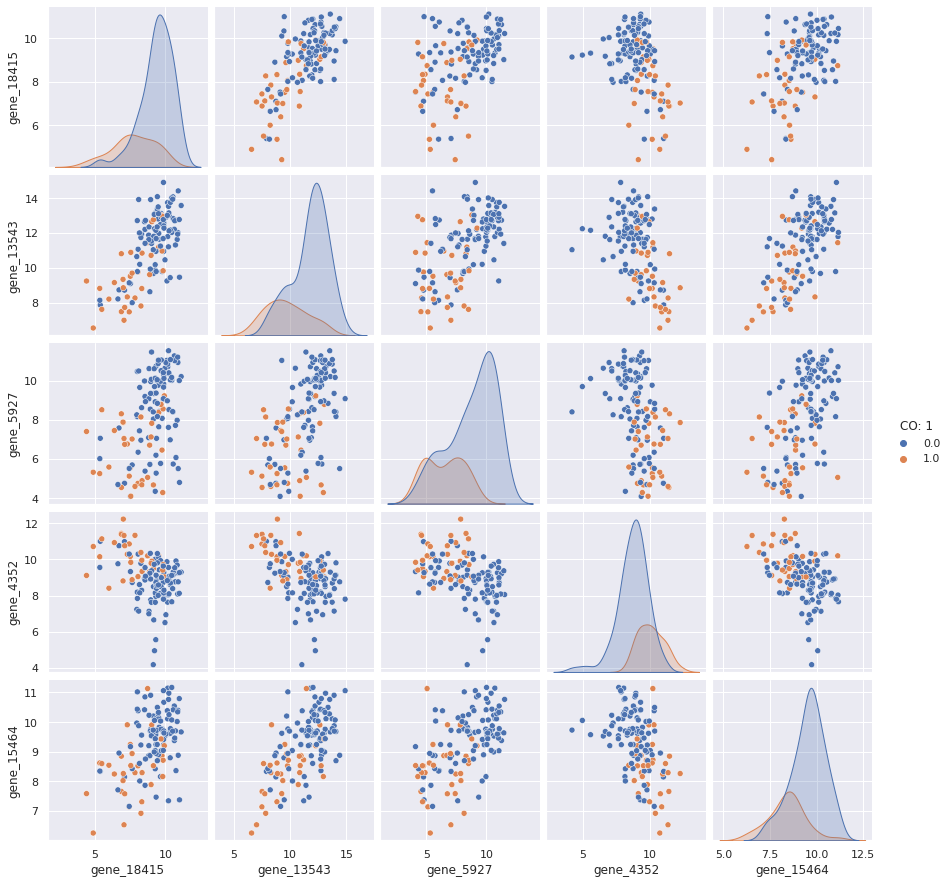

In [15]:
pplot(imp_features(X1, co1), co1, 'CO: 1')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


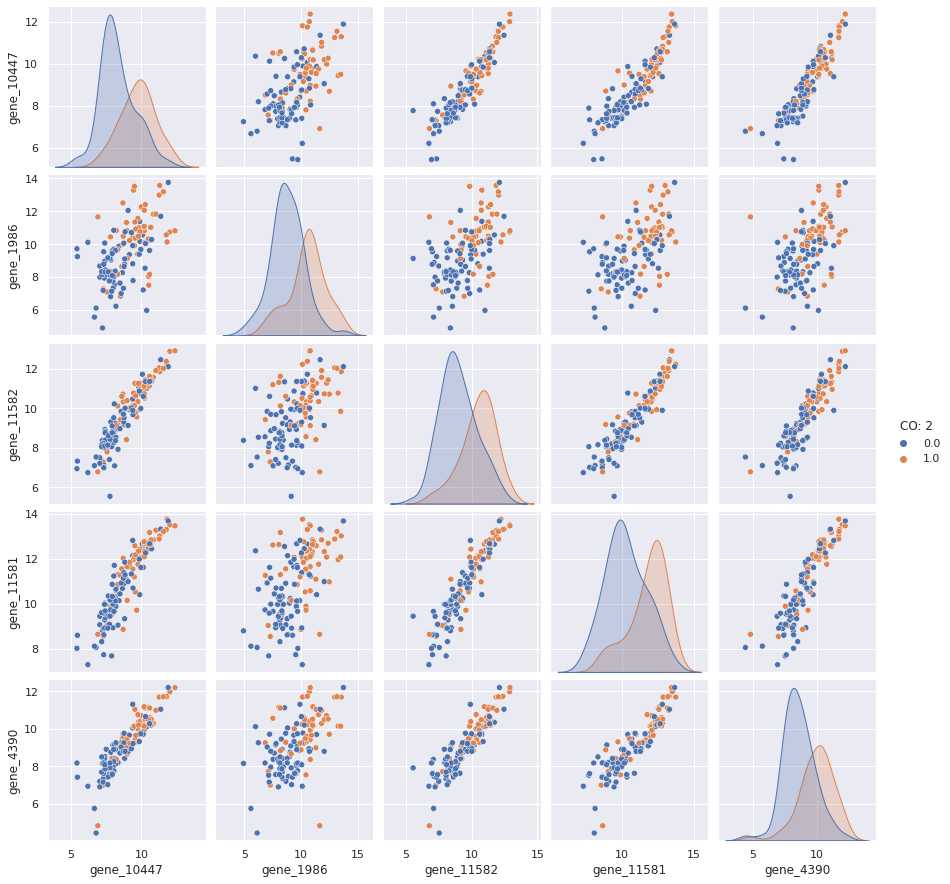

In [16]:
pplot(imp_features(X1, co2), co2, 'CO: 2')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


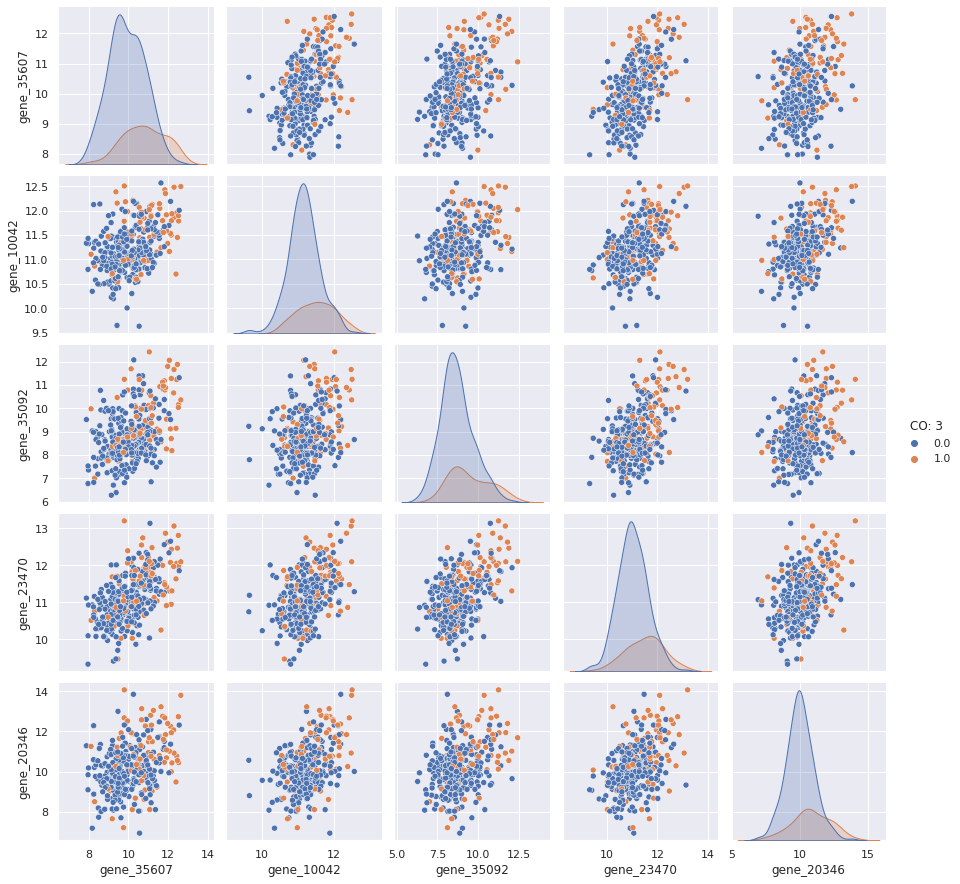

In [18]:
pplot(imp_features(X2, co3), co3, 'CO: 3')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


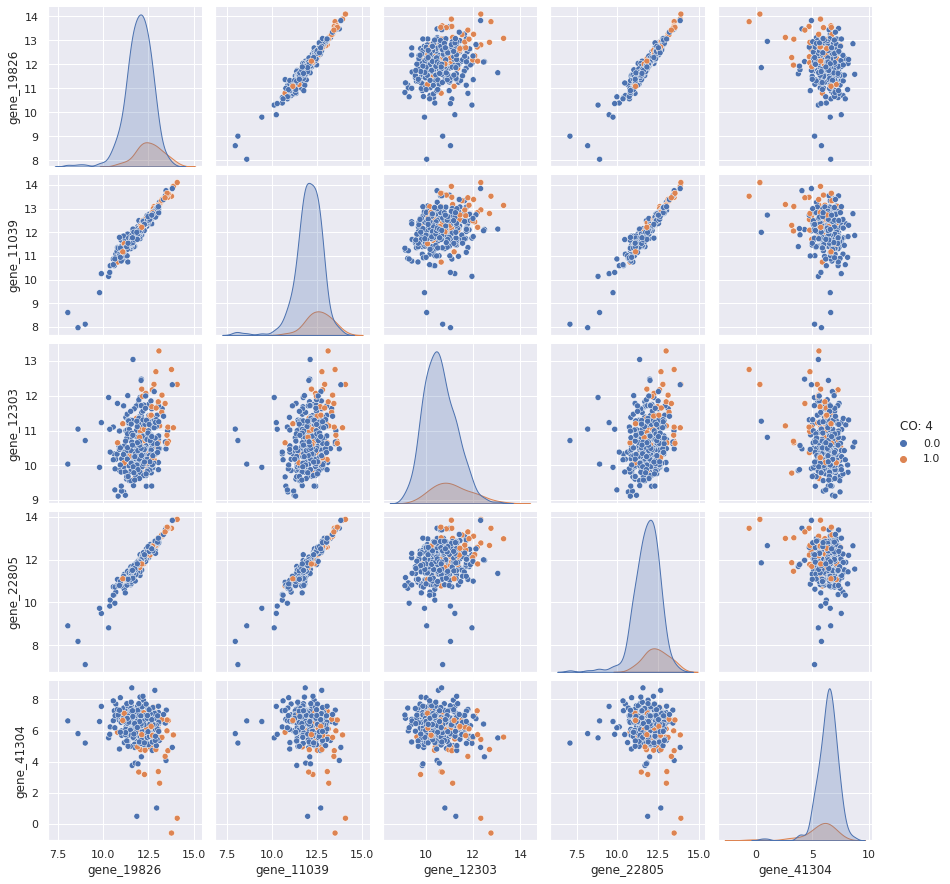

In [19]:
pplot(imp_features(X2, co4), co4, 'CO: 4')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


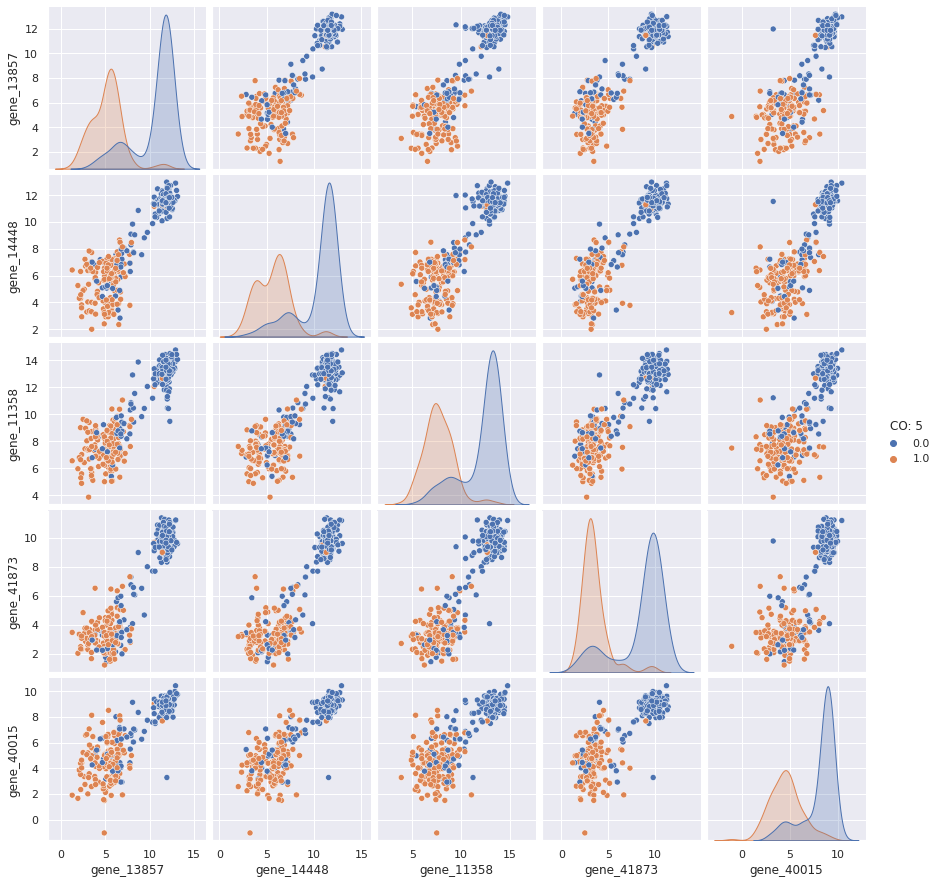

In [20]:
pplot(imp_features(X2, co5), co5, 'CO: 5')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


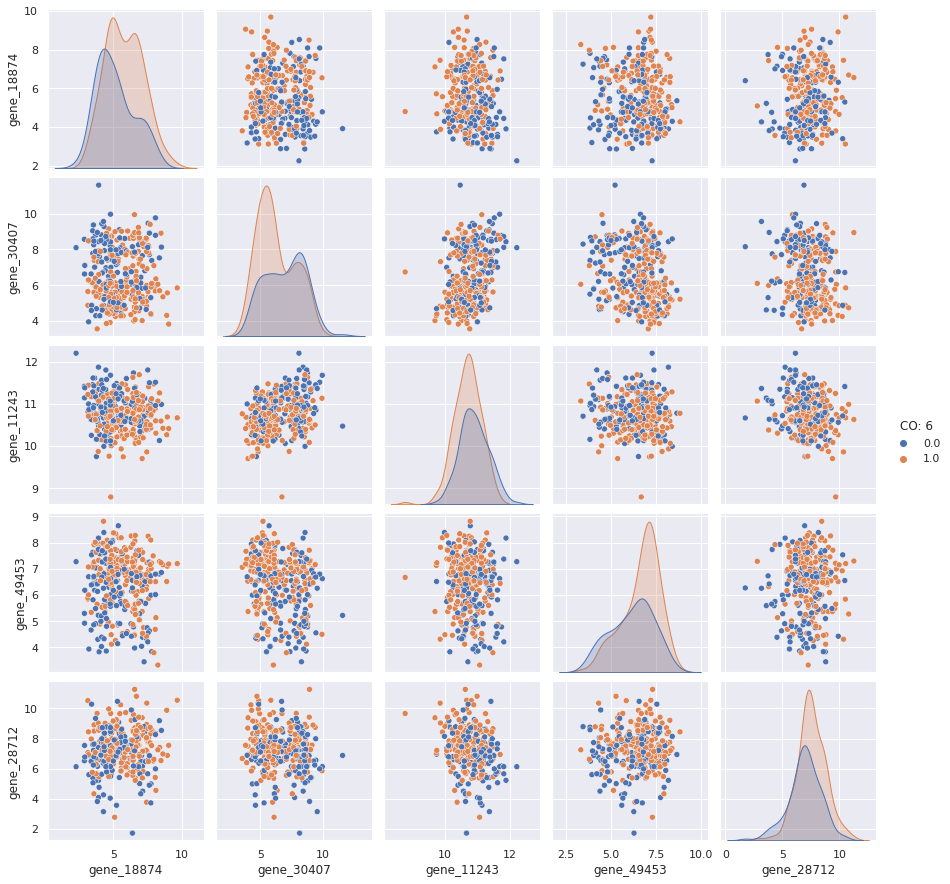

In [21]:
pplot(imp_features(X2, co6), co6, 'CO: 6')